In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from SALib.analyze import sobol, pawn

In [2]:
df_in = pd.read_csv('../data/sobol_params.csv')
X = df_in.to_numpy()

In [3]:
df_out = pd.read_csv('../data/sobol_output.csv')
Y = df_out.to_numpy()

In [4]:
seed = 1234

In [5]:
param_names = ['beta1', 'beta2', 'beta3', 'mu', 'omega', 'wage']
param_bounds = [[1., 3.], [-0.9, -0.5], [-0.4, -0.2], [0.2, 1], [0.45, 1.], [3., 6.]]
problem = {
    'num_vars': len(param_names),
    'names': param_names,
    'bounds': param_bounds
} 

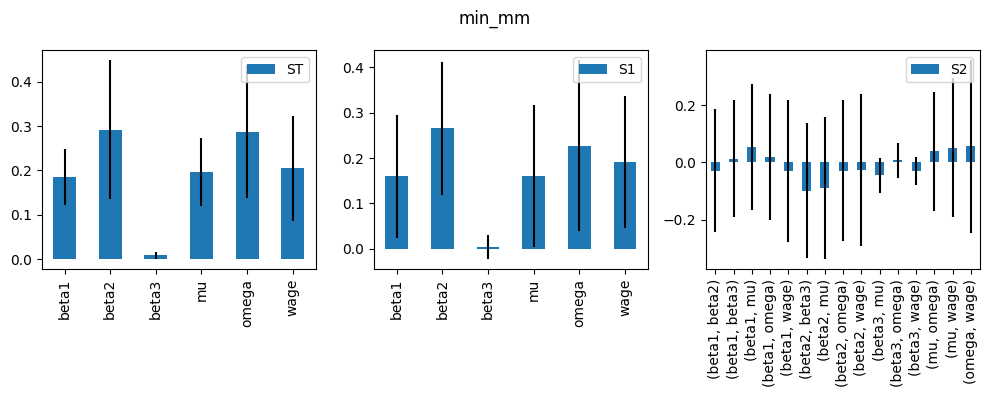

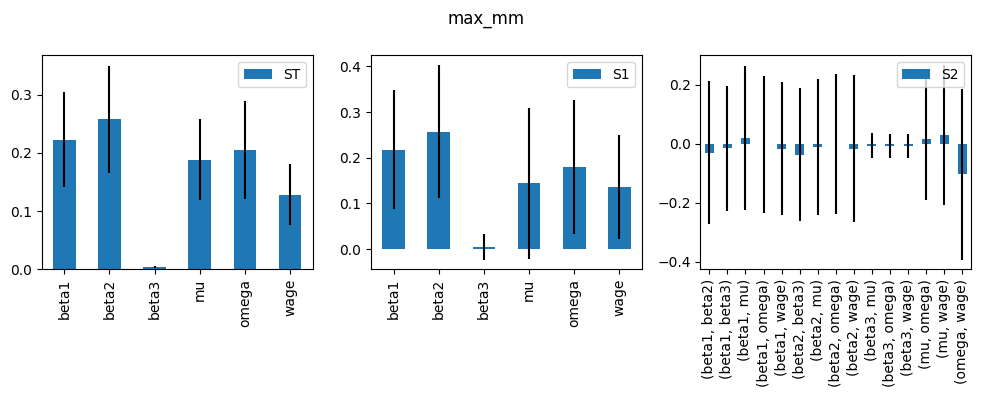

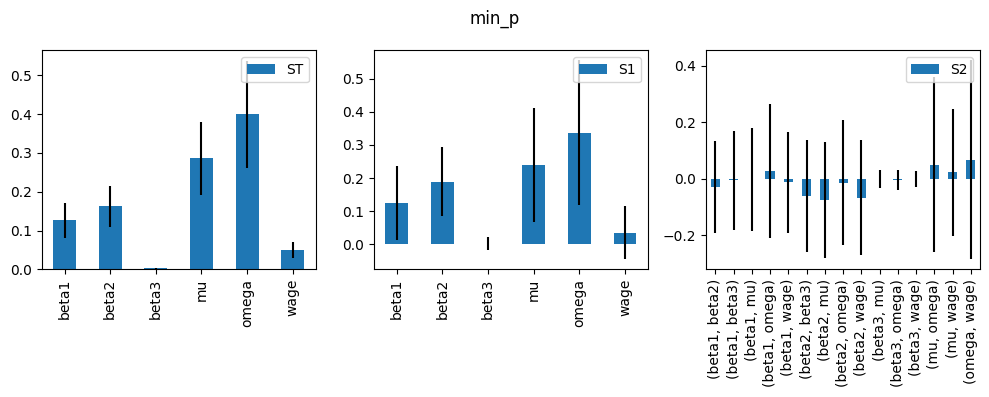

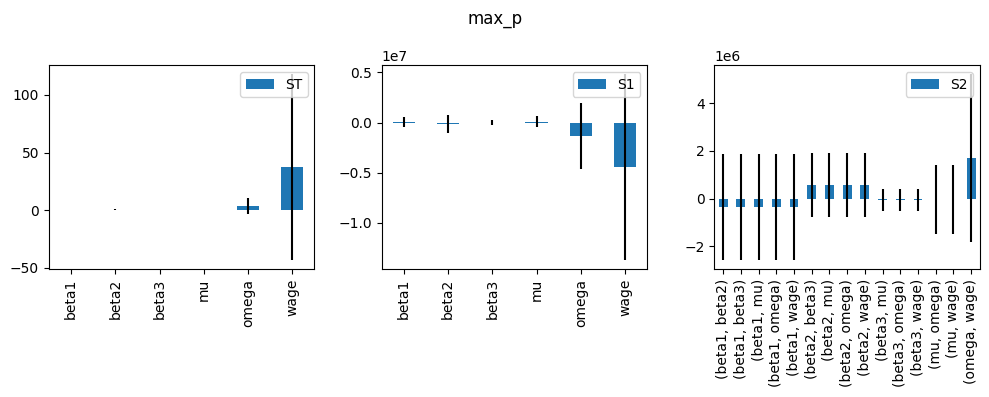

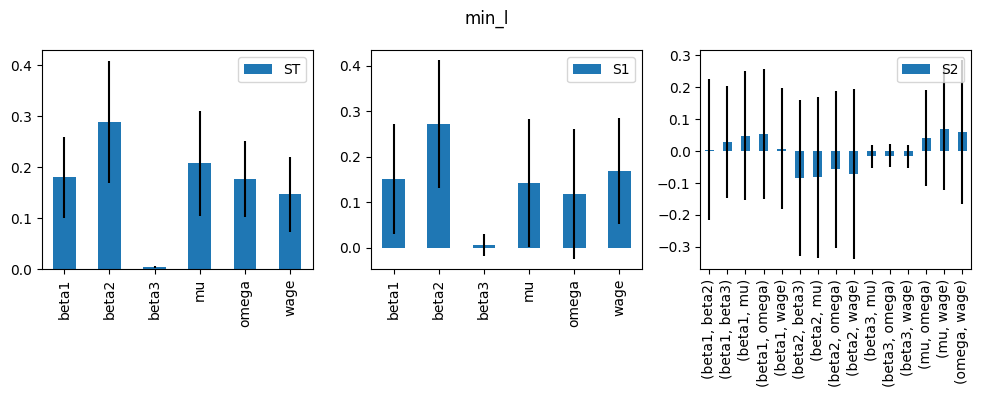

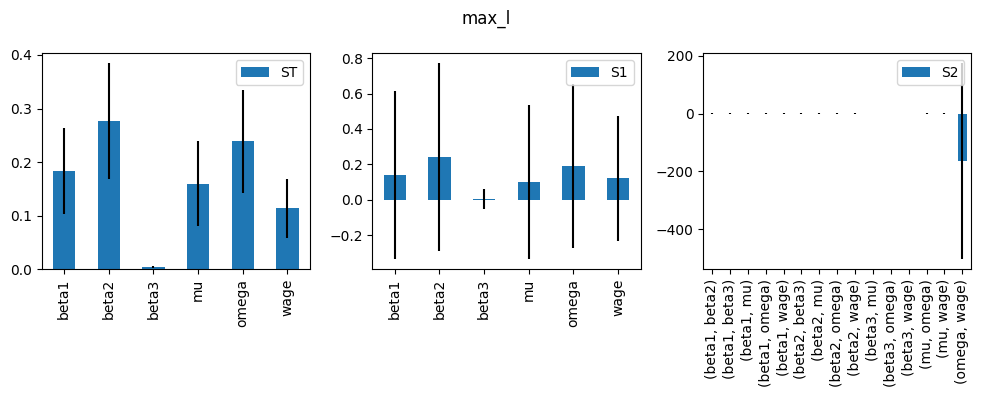

In [6]:
dep_vars = ['min_mm', 'max_mm', 'min_p', 'max_p', 'min_l', 'max_l']
for i, name in zip(range(len(dep_vars)), dep_vars):

    Si_sobol = sobol.analyze(
                        problem, 
                        Y[:, i], 
                        calc_second_order=True, 
                        print_to_console=False, 
                        seed=1234
                    )
    
    axes = Si_sobol.plot()
    fig = plt.gcf()  # get current figure
    fig.set_size_inches(10, 4)
    fig.suptitle(f'{name}')
    plt.tight_layout()
    plt.show()

        minimum      mean    median   maximum        CV
beta1  0.081988  0.207020  0.190419  0.306176  0.375596
beta2  0.099845  0.221534  0.250057  0.350074  0.450104
beta3  0.059924  0.093810  0.088084  0.131696  0.299643
mu     0.070685  0.204705  0.206516  0.312500  0.371231
omega  0.110119  0.241037  0.257970  0.372396  0.298540
wage   0.091146  0.186083  0.167625  0.382068  0.499269


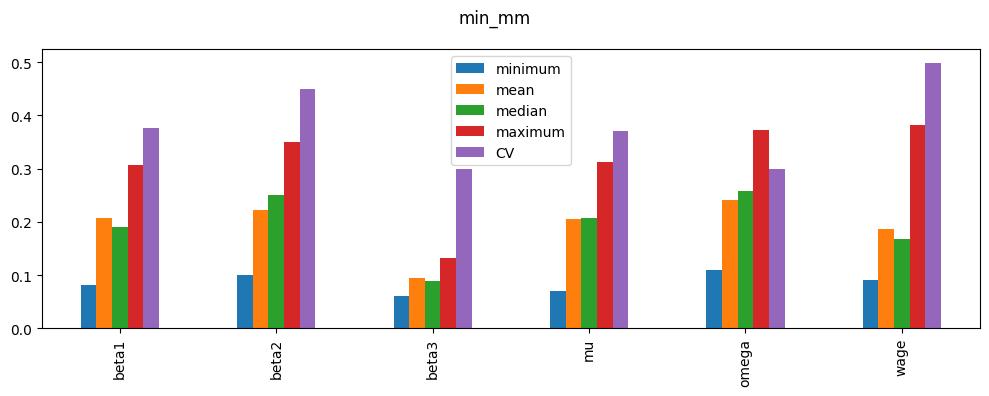

        minimum      mean    median   maximum        CV
beta1  0.079756  0.217139  0.208061  0.316220  0.374899
beta2  0.086624  0.230111  0.266426  0.362351  0.459314
beta3  0.055546  0.092202  0.081387  0.143973  0.322780
mu     0.057778  0.197456  0.203855  0.302455  0.400609
omega  0.106771  0.235505  0.247124  0.351190  0.287492
wage   0.083534  0.179398  0.158783  0.376488  0.496106


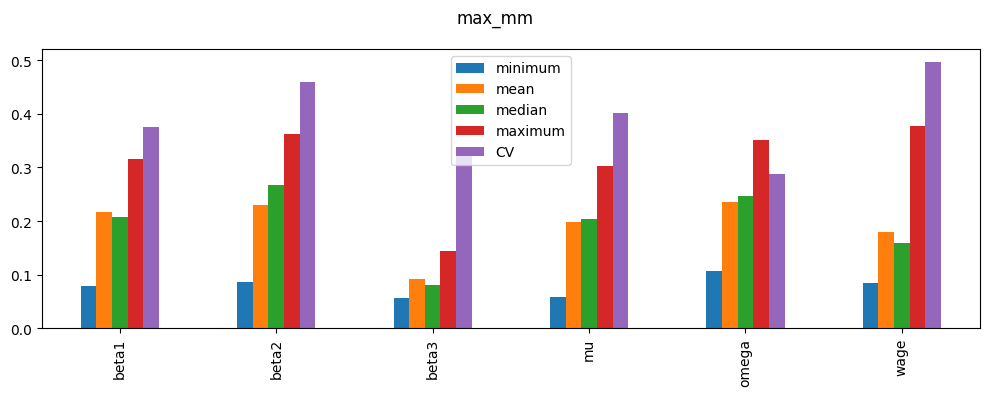

        minimum      mean    median   maximum        CV
beta1  0.052370  0.167685  0.151500  0.302827  0.442056
beta2  0.100446  0.202910  0.207418  0.289749  0.337373
beta3  0.066535  0.108969  0.083748  0.188874  0.389113
mu     0.118819  0.248884  0.271892  0.377232  0.375499
omega  0.135417  0.308974  0.324734  0.495536  0.342822
wage   0.084392  0.144139  0.143458  0.207246  0.285889


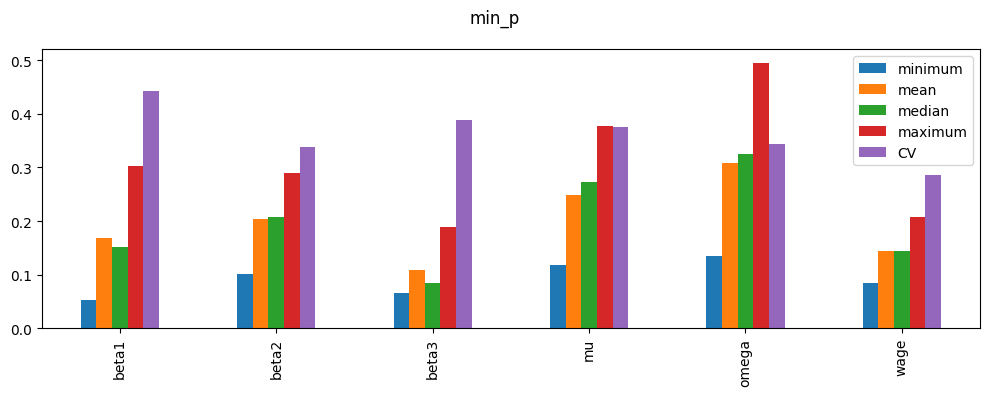

        minimum      mean    median   maximum        CV
beta1  0.073918  0.187271  0.161745  0.331473  0.384491
beta2  0.091003  0.183562  0.197731  0.276442  0.348109
beta3  0.057091  0.121431  0.101677  0.235920  0.477447
mu     0.065677  0.186135  0.203125  0.302627  0.433015
omega  0.174851  0.344477  0.359504  0.572173  0.329563
wage   0.041981  0.135159  0.140468  0.213599  0.382537


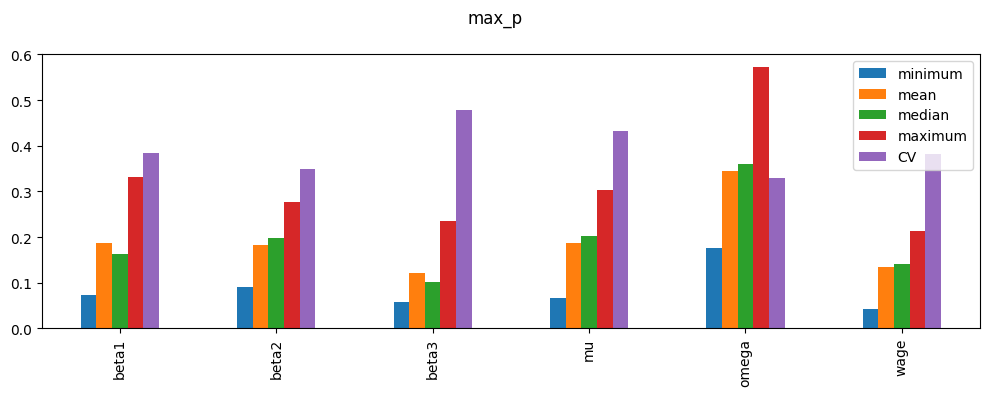

        minimum      mean    median   maximum        CV
beta1  0.078640  0.208001  0.197030  0.320685  0.391520
beta2  0.091861  0.213879  0.239197  0.346068  0.475967
beta3  0.062500  0.093389  0.092934  0.132812  0.279945
mu     0.068166  0.217771  0.221669  0.332589  0.383410
omega  0.104539  0.217311  0.228752  0.314732  0.271135
wage   0.088170  0.193409  0.171703  0.401414  0.481058


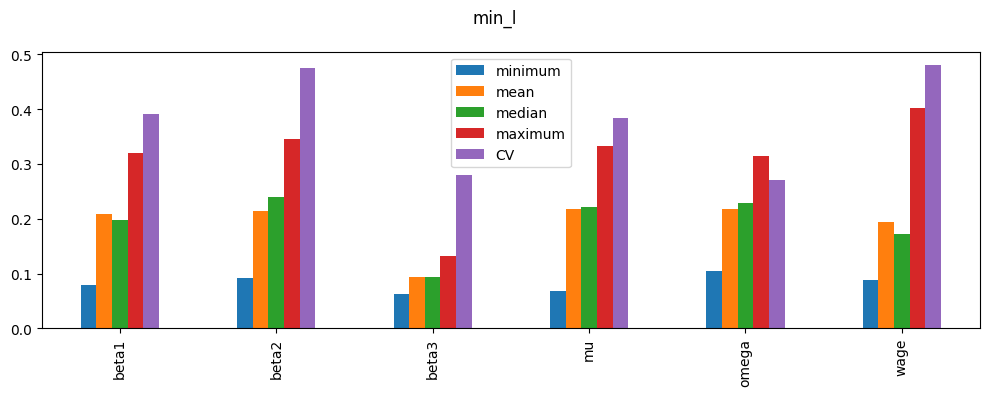

        minimum      mean    median   maximum        CV
beta1  0.079756  0.212054  0.196815  0.319940  0.390355
beta2  0.091690  0.221801  0.246709  0.347842  0.449643
beta3  0.052455  0.093664  0.085651  0.148065  0.334380
mu     0.065476  0.196300  0.204155  0.296875  0.385109
omega  0.119048  0.250049  0.266355  0.377604  0.293771
wage   0.080958  0.181050  0.156465  0.386533  0.515265


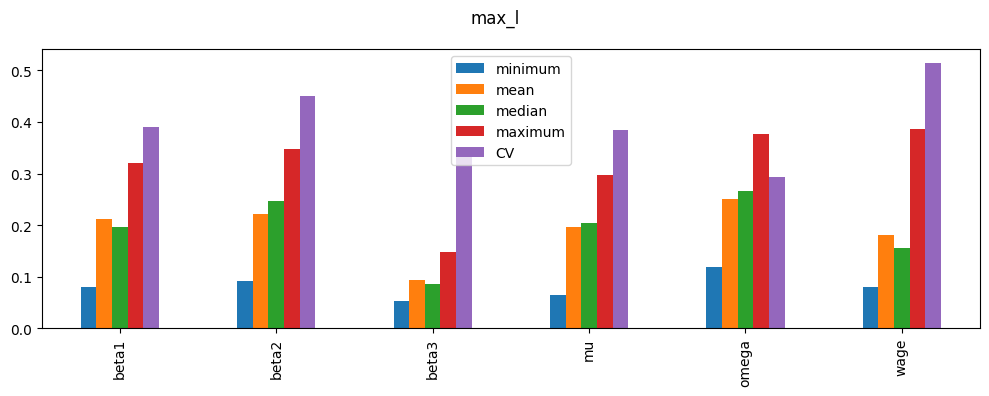

In [7]:
dep_vars = ['min_mm', 'max_mm', 'min_p', 'max_p', 'min_l', 'max_l']
for i, name in zip(range(len(dep_vars)), dep_vars):

    Si_pawn = pawn.analyze(problem, X, Y[:,i], print_to_console=True)
    
    axes = Si_pawn.plot()
    fig = plt.gcf()  # get current figure
    fig.set_size_inches(10, 4)
    fig.suptitle(f'{name}')
    plt.tight_layout()
    plt.show()

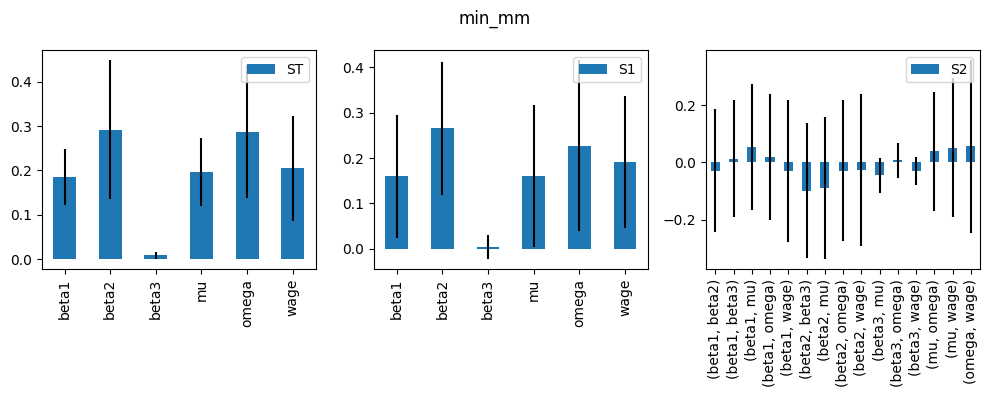

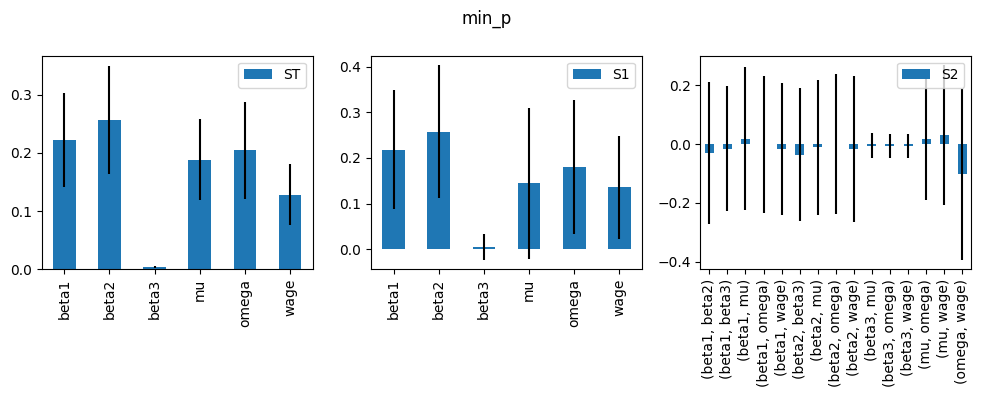

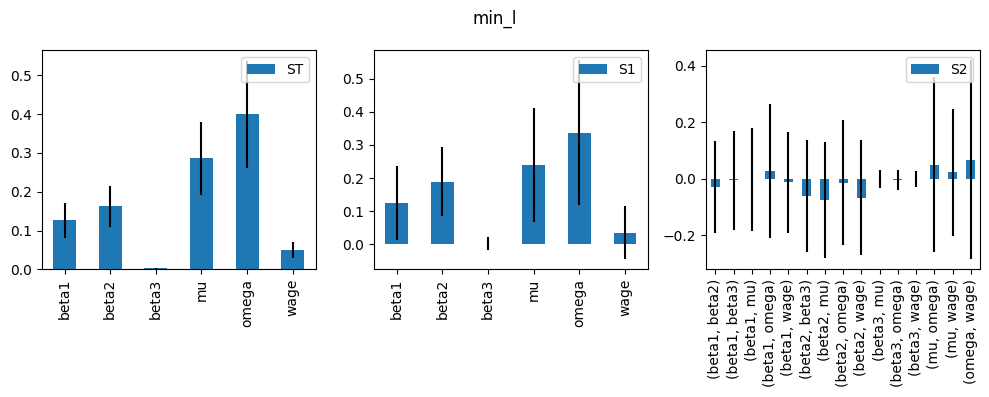

In [8]:
dep_vars = ['min_mm', 'min_p', 'min_l']
for i, name in zip(range(len(dep_vars)), dep_vars):

    Si_sobol = sobol.analyze(
                        problem, 
                        Y[:, i], 
                        calc_second_order=True, 
                        print_to_console=False, 
                        seed=1234
                    )
    
    axes = Si_sobol.plot()
    fig = plt.gcf()  # get current figure
    fig.set_size_inches(10, 4)
    fig.suptitle(f'{name}')
    plt.tight_layout()
    plt.show()